<a href="https://colab.research.google.com/github/FGalvao77/Classificador-Naive-Bayes-com-Scikit-learn/blob/main/Classificador_Naive_Bayes_com_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classificador `Naive Bayes` com _Scikit-learn_**
---
---

In [1]:
import warnings   
from sklearn.datasets import make_blobs

warnings.filterwarnings('ignore')

In [2]:
X, y = make_blobs(
    n_samples=300, centers=2,
    random_state=1522, cluster_std=1.5
)

In [3]:
len(X), len(y)

(300, 300)

In [4]:
X[:5]

array([[ 1.55059571, -0.57572343],
       [ 5.57176608, -2.23992114],
       [ 5.42796985, 10.67834224],
       [ 2.67221704,  8.54600801],
       [ 3.6804256 ,  8.17093567]])

In [5]:
y[:5]

array([0, 0, 1, 1, 1])

In [6]:
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline 
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 12, 9

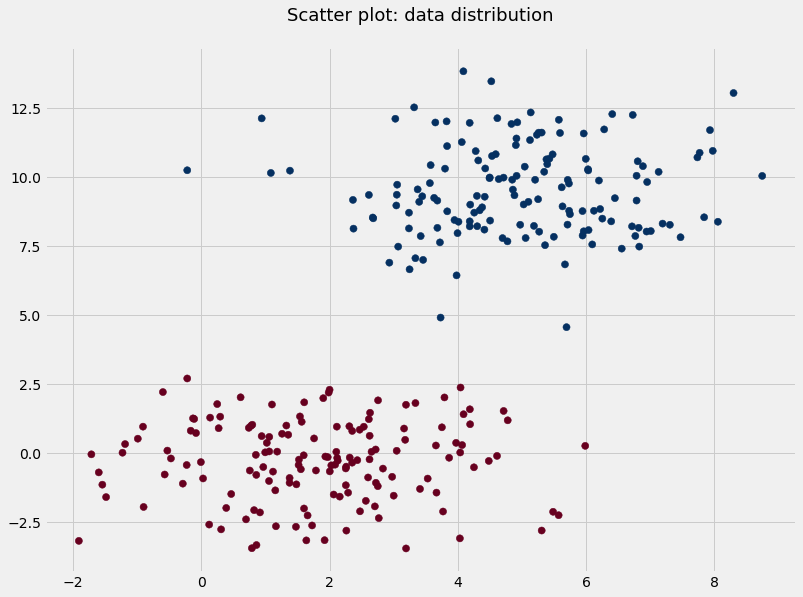

In [7]:
plt.scatter(
    x=X[:, 0], y=X[:, 1],
    c=y, s=50, cmap='RdBu'
)

plt.title(label='Scatter plot: data distribution\n', size=18)
plt.show()

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
gauss = GaussianNB()

In [10]:
gauss.fit(X=X, y=y)

GaussianNB()

In [11]:
import numpy as np

In [12]:
rs = np.random.RandomState(1522)

In [13]:
new_data = [-6, -14] + [14, 18] * rs.rand(500, 2)

In [14]:
y_new_data = gauss.predict(X=new_data)

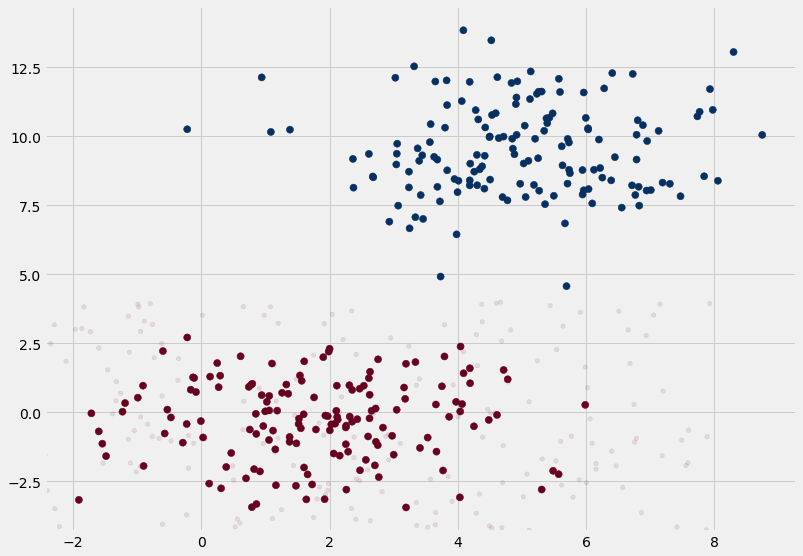

In [15]:
plt.scatter(x=X[:, 0], 
            y=X[:, 1],
            c=y, 
            s=50, 
            cmap='RdBu')

limit = plt.axis()

plt.scatter(x=new_data[:, 0], 
            y=new_data[:, 1], 
            c=y_new_data,
            s=20,
            cmap='RdBu', 
            alpha=0.1)

plt.axis(limit)
plt.show()

In [16]:
y_prob = gauss.predict_proba(new_data)

In [17]:
y_prob[-15:].round(2)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [18]:
from sklearn.datasets import fetch_20newsgroups

In [19]:
data = fetch_20newsgroups()

data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [20]:
CATEGORIES = [
    'alt.atheism',
    'comp.graphics',
    'sci.space',
    'soc.religion.christian',
    'talk.politics.guns',
    'talk.religion.misc'
]

In [21]:
train = fetch_20newsgroups(subset='train', categories=CATEGORIES)

test = fetch_20newsgroups(subset='test', categories=CATEGORIES)

In [22]:
len(train), len(test)

(5, 5)

In [23]:
print(train.data[5])

From: dbernard@clesun.Central.Sun.COM (Dave Bernard)
Subject: Re: Who's next?  Mormons and Jews?
Organization: Sun Microsystems
Lines: 20
Distribution: world
Reply-To: dbernard@clesun.Central.Sun.COM
NNTP-Posting-Host: clesun.central.sun.com

>>The two situations are hardly analogous, unless you wish to make the
>>>dubious claim that the US legal system would provide equivalent treatment 
>>>to BD children that the Romans did for those of conquered rebels.

>Actually, all the analogy calls for the the Branch Davidian _feeling_
>their treatment would be along these lines. After a military
>assualt (instead of a peacefull effort to serve a warrant) and
>weeks os siege, such a feeling might not be completely irrational.


Actually, if I were one of the survivors and wanted to institute a civil
rights violation lawsuit against the Treasury Dept., I would claim that
the BATF/FBI itself was to blame for any mass hysteria/insanity...

without due process, the siegers shone lights, laser beams

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [25]:
pipe = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

In [26]:
pipe.fit(X=train.data,
         y=train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [27]:
labels = pipe.predict(test.data)

In [28]:
labels[:5]

array([0, 0, 3, 2, 3])

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

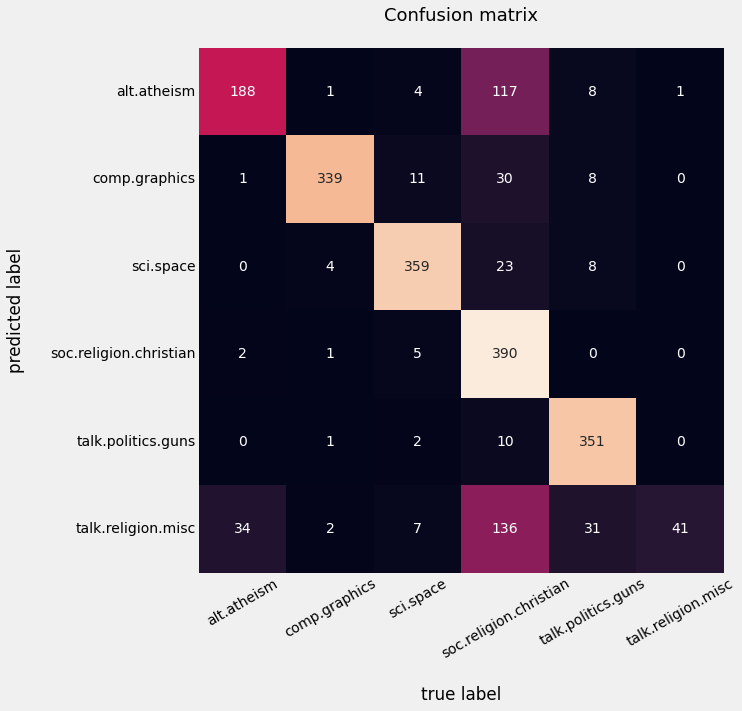

In [30]:
cm = confusion_matrix(y_true=test.target,
                      y_pred=labels)

sns.heatmap(data=cm,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=train.target_names,
            yticklabels=train.target_names)

plt.title('Confusion matrix\n', size=18)
plt.xlabel('\ntrue label')
plt.ylabel('predicted label\n')
plt.xticks(rotation=30)
plt.show()

In [31]:
def predict_category(text:str, train, model):
    prediction = model.predict([text])
    
    return train.target_names[prediction[0]]

In [32]:
predict_category(text='sending a payload to the ISS', 
                 train=train,
                 model=pipe)

'sci.space'

In [33]:
predict_category(text='discussing islam vs atheism',
                 train=train,
                 model=pipe)

'alt.atheism'

In [34]:
predict_category(text='determining the screen resolution',
                 train=train,
                 model=pipe)

'comp.graphics'

<br>

### **BÔNUS**

In [35]:
from sklearn.linear_model import (LogisticRegression,
                                  PassiveAggressiveClassifier, 
                                  SGDClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

In [36]:
def clf(estimator:str, X_train:str, y_train:str, X_test:str):
    pipe = make_pipeline(TfidfVectorizer(),
                         estimator).fit(X_train, y_train)

    labels = pipe.predict(X_test)

    return labels

In [37]:
model = clf(estimator=MultinomialNB(), 
            X_train=train.data, y_train=train.target,
            X_test=test.data)

In [39]:
labels

array([0, 0, 3, ..., 3, 1, 4])

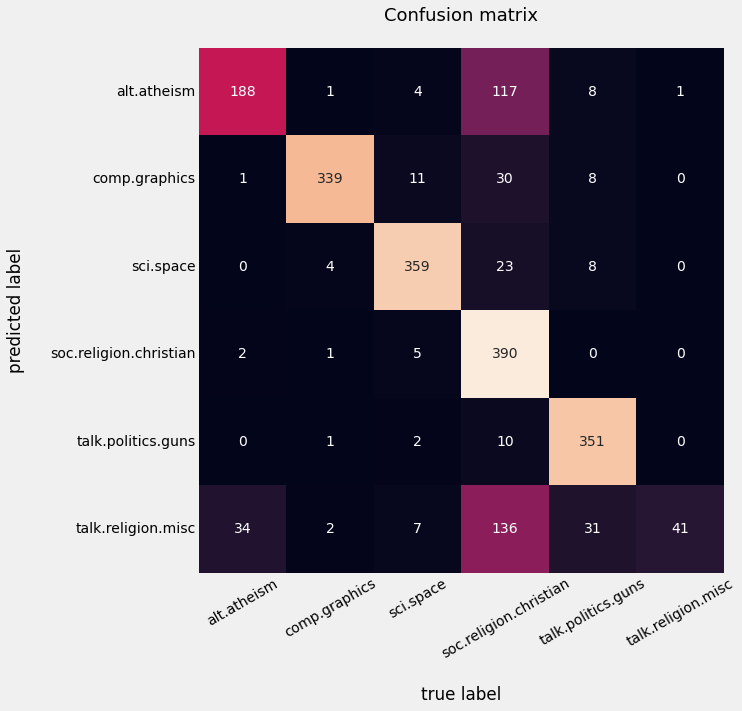

In [40]:
cm = confusion_matrix(y_true=test.target,
                      y_pred=labels)

sns.heatmap(data=cm,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=train.target_names,
            yticklabels=train.target_names)

plt.title('Confusion matrix\n', size=18)
plt.xlabel('\ntrue label')
plt.ylabel('predicted label\n')
plt.xticks(rotation=30)
plt.show()

In [41]:
def classifier(estimator:str, X_train:str, y_train:str, 
               X_test:str, y_test:str):

    pipe = make_pipeline(TfidfVectorizer(), 
                         estimator).fit(X_train, y_train)

    labels = pipe.predict(X_test)

    cm = confusion_matrix(y_true=y_test,
                      y_pred=labels)

    sns.heatmap(data=cm,
                square=True,
                annot=True,
                fmt='d',
                cbar=False,
                xticklabels=train.target_names,
                yticklabels=train.target_names
                )

    plt.title('Confusion matrix\n', size=18)
    plt.xlabel('\ntrue label')
    plt.ylabel('predicted label\n')
    plt.xticks(rotation=15)

    return plt.show()

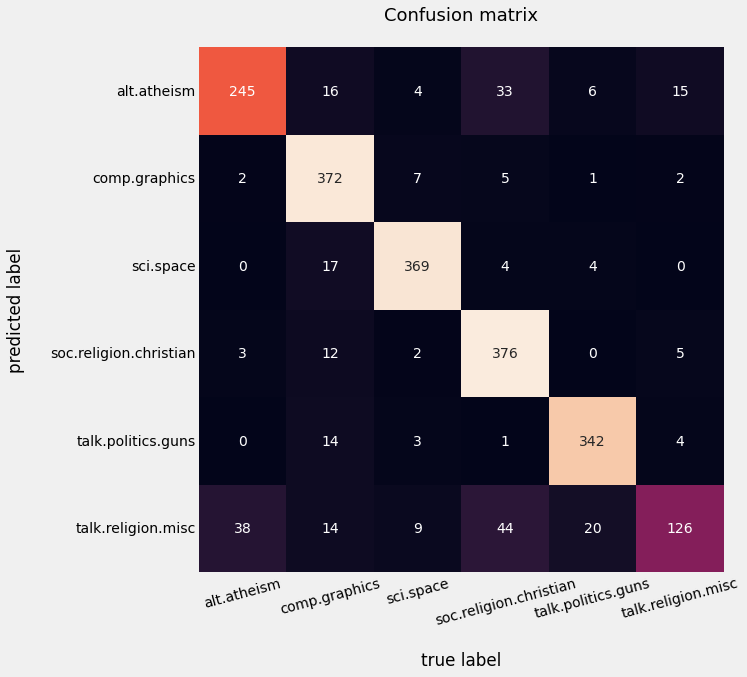

In [42]:
classifier(estimator=LogisticRegression(max_iter=300, n_jobs=-1, penalty='l2', random_state=1522),
           X_train=train.data,
           y_train=train.target,
           X_test=test.data,
           y_test=test.target)

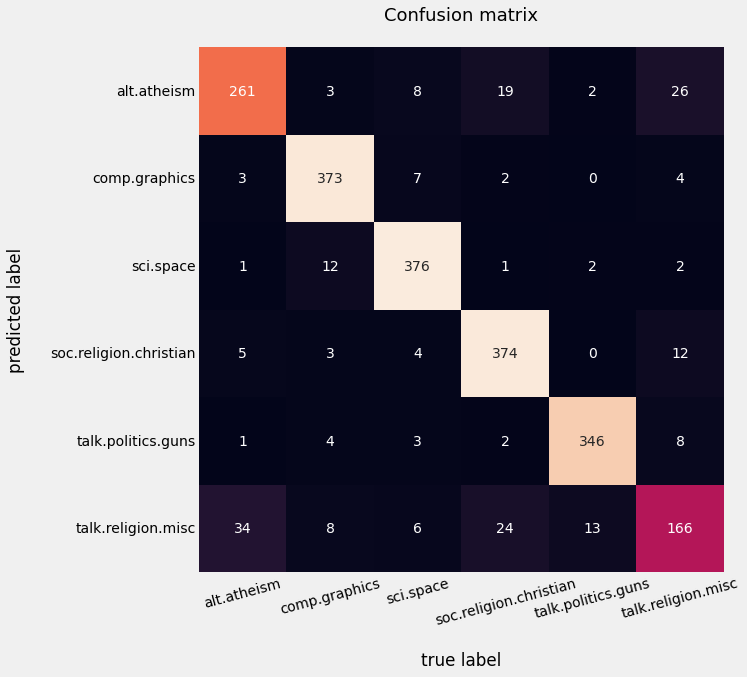

In [43]:
classifier(estimator=PassiveAggressiveClassifier(n_jobs=-1, random_state=1522), 
           X_train=train.data,
           y_train=train.target,
           X_test=test.data,
           y_test=test.target)

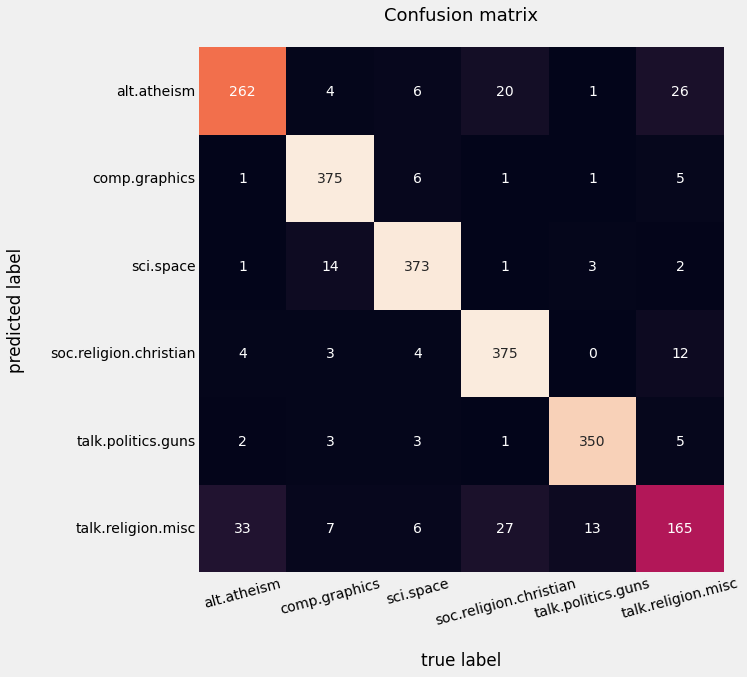

In [44]:
classifier(estimator=SGDClassifier(average=True, n_jobs=-1, random_state=1522), 
           X_train=train.data,
           y_train=train.target,
           X_test=test.data,
           y_test=test.target)

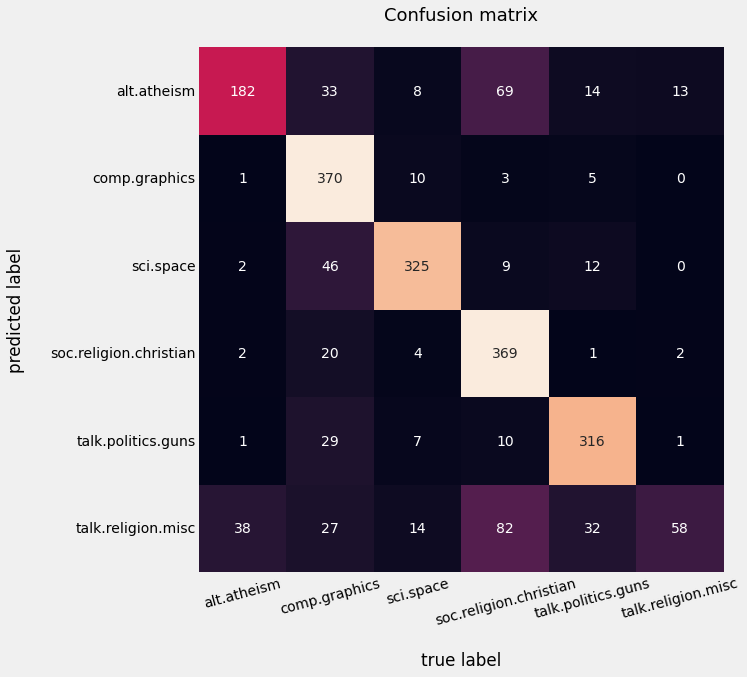

In [45]:
classifier(estimator=RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=1522), 
           X_train=train.data,
           y_train=train.target,
           X_test=test.data,
           y_test=test.target)

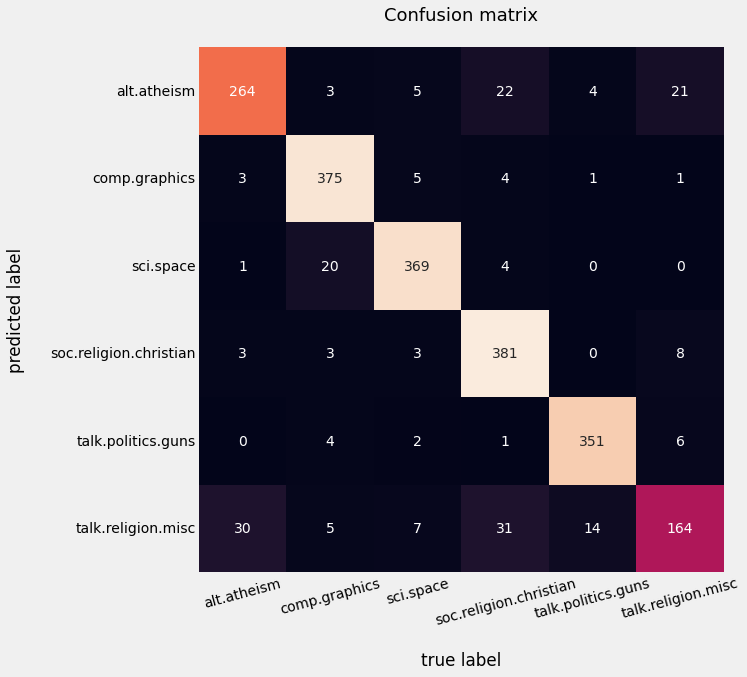

In [46]:
classifier(estimator=MLPClassifier(), 
           X_train=train.data,
           y_train=train.target,
           X_test=test.data,
           y_test=test.target)

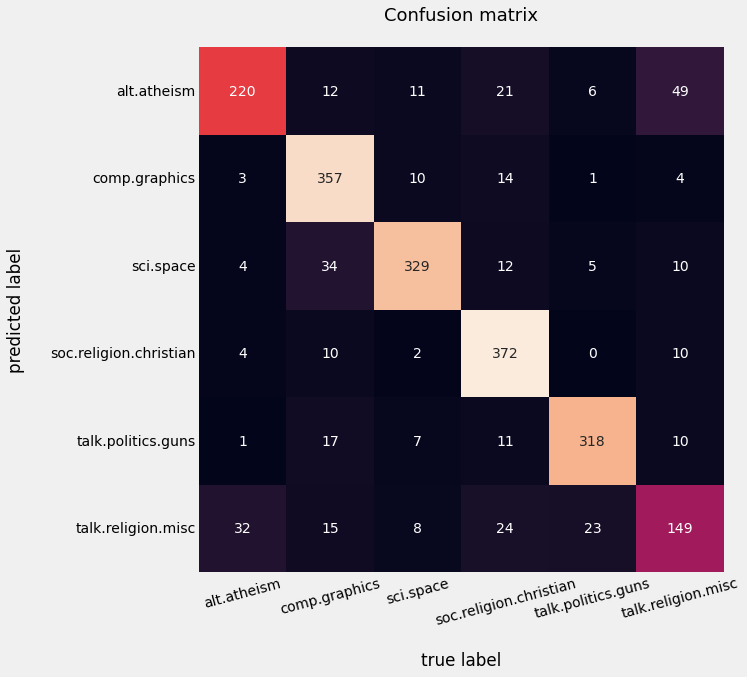

In [47]:
classifier(estimator=XGBClassifier(), 
           X_train=train.data,
           y_train=train.target,
           X_test=test.data,
           y_test=test.target)

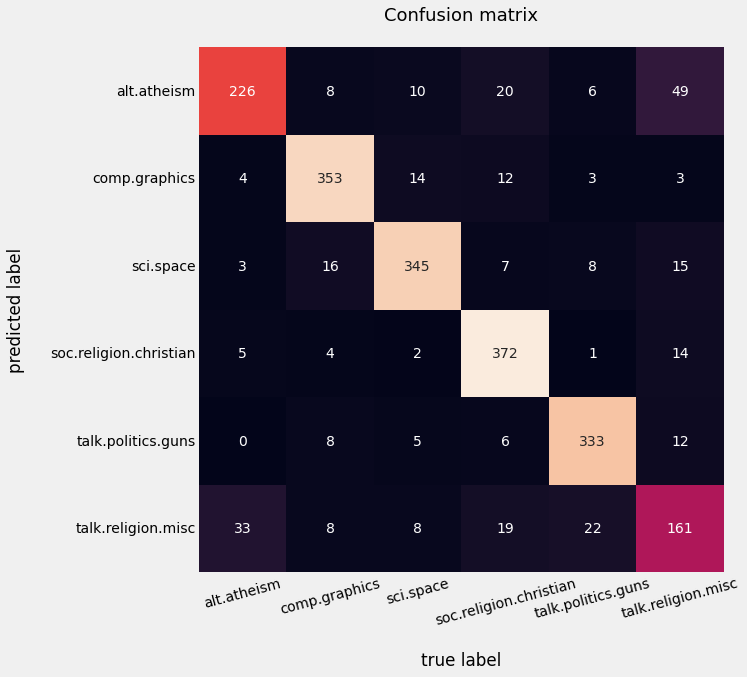

In [48]:
classifier(estimator=LGBMClassifier(), 
           X_train=train.data,
           y_train=train.target,
           X_test=test.data,
           y_test=test.target)

In [49]:
%whos

Variable                      Type           Data/Info
------------------------------------------------------
CATEGORIES                    list           n=6
GaussianNB                    ABCMeta        <class 'sklearn.naive_bayes.GaussianNB'>
LGBMClassifier                type           <class 'lightgbm.sklearn.LGBMClassifier'>
LogisticRegression            type           <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MLPClassifier                 ABCMeta        <class 'sklearn.neural_ne<...>erceptron.MLPClassifier'>
MultinomialNB                 ABCMeta        <class 'sklearn.naive_bayes.MultinomialNB'>
PassiveAggressiveClassifier   ABCMeta        <class 'sklearn.linear_mo<...>iveAggressiveClassifier'>
RandomForestClassifier        ABCMeta        <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SGDClassifier                 ABCMeta        <class 'sklearn.linear_mo<...>_gradient.SGDClassifier'>
TfidfVectorizer               type           <class 'sklearn.feature_e<...

In [50]:
%who_ls

['CATEGORIES',
 'GaussianNB',
 'LGBMClassifier',
 'LogisticRegression',
 'MLPClassifier',
 'MultinomialNB',
 'PassiveAggressiveClassifier',
 'RandomForestClassifier',
 'SGDClassifier',
 'TfidfVectorizer',
 'X',
 'XGBClassifier',
 'classifier',
 'clf',
 'cm',
 'confusion_matrix',
 'data',
 'fetch_20newsgroups',
 'gauss',
 'labels',
 'limit',
 'make_blobs',
 'make_pipeline',
 'model',
 'new_data',
 'np',
 'pipe',
 'plt',
 'predict_category',
 'rcParams',
 'rs',
 'sns',
 'test',
 'train',
 'warnings',
 'y',
 'y_new_data',
 'y_prob']